In [1]:
import numpy as np
from matplotlib import pyplot as plt
from CDDF_analysis.qso_loader_dr16q import QSOLoaderDR16Q

from CDDF_analysis.make_dr16q_plots import *

# Examples for QSOLoader, a plotting class

Welcome to this example notebook! If you are interested in the DR16 DLA catalogue we have, but not interested in modifying the model(, which is in MATLAB) or running the model by yourself. This is the right place!

For people who prefer to look into the mathematics in the model, please refer to the README in the repo.

And you can always find all of the plotting functions for the paper in CDDF_analysis/make_dr16q_plots.py

- All of the data products of the GP DLA catalogue could be found in : [**download link**](https://drive.google.com/drive/folders/1uaaUVLpCdhSVC7rGFN_C5TuvQZLk2cyn?usp=sharing) (the same as the one in the README)
- It is required to have DR9's DLA labels as prior:

```bash
    # in shell
    cd data/scripts
    ./download_spectra.sh
```

- DR16Q catalogue from SDSS is required. If you do not want to download it by yourselves, run the shell script:

```bash
        # in shell
        cd data/scripts
        bash download_catalogs_dr16q.sh
```


## Loading into the class

- `preloaded_file` : a file for all of the raw spectra (filtered by the condition given in the paper).
- `catalogue_file` : a processed MATLAB catalogue for sightlines in DR16Q
- `processed_file` : the GP DLA catalogue in MATLAB format
- `learned_file` : the learned GP null model
- `dla_concordance`: a text file for the DR9 DLA concordance catalogue
- `log_concordance`: a text file for the sightlines of DR9 concordance catalogue
- `snrs_file` : a file contains the SNRs of each spectrum
- `sub_dla` : whether you have a subDLA model in the processed_file
- `sample_file` : the Quasi-Monte Carlo samples used for computing the likelihood of the DLA model
- `occams_razor` : a regularization factor to prevent the DLA model overfit the data. Fixed to 1/30
- `dist_file` : the raw DR16Q catalogue from SDSS

In [2]:
qsos_dr16q = QSOLoaderDR16Q(
    preloaded_file="data/dr16q/processed/preloaded_qsos_zPCA.mat",
    catalogue_file="data/dr16q/processed/catalog_zPCA.mat",
    processed_file="data/dr16q/processed/processed_qsos_multi_meanflux_dr16q_full_int_small.mat",
    learned_file="data/dr16q/processed/learned_qso_model_lyseries_variance_wmu_boss_dr16q_minus_dr12q_gp_851-1421.mat",
    dla_concordance="data/dla_catalogs/dr9q_concordance/processed/dla_catalog",
    los_concordance="data/dla_catalogs/dr9q_concordance/processed/los_catalog",
    snrs_file="data/dr16q/processed/snrs_qsos_multi_meanflux_dr16q_zPCA.mat",
    sub_dla=True,
    sample_file="data/dr12q/processed/dla_samples_a03_30000.mat",
    occams_razor=1 / 30, tau_sample_file="data/dr12q/processed/tau_0_samples_30000.mat",
    dist_file="data/dr16q/distfiles/DR16Q_v4.fits")

[Warning] 5652 DLAs lost and 54452 QSOs lost after np.in1d (searching matched thing_ids in the test data).
[Info] 160227 -> 159990 after filtering out uncertain z measures.
[Info] 159990 -> 159986 after setting IS_QSO_FINAL == 1.
[Info] 159986 -> 159981 after setting class_person == 3 or 0.
[Info] 159981 -> 159871 after filtering out SOURCE_Z: PIPE and Z > 5


## Plot the spectrum

[Info] no map values stored currently for null model ...


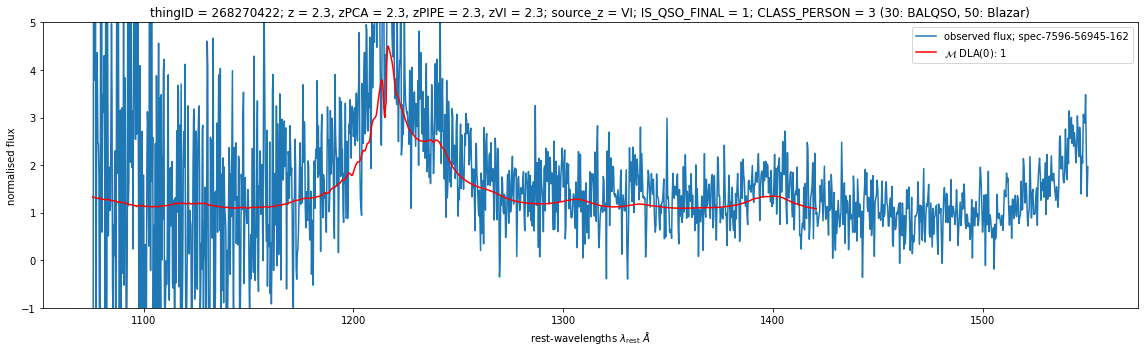

In [3]:
# plot the first spectrum in the DLA catalogue!
nspec = 0

qsos_dr16q.plot_this_mu(nspec)
plt.title(
    'thingID = {}; z = {:.2g}, zPCA = {:.2g}, zPIPE = {:.2g}, zVI = {:.2g}; source_z = {}; IS_QSO_FINAL = {}; CLASS_PERSON = {} (30: BALQSO, 50: Blazar)'.format(
        qsos_dr16q.thing_ids[nspec],
        qsos_dr16q.z_qsos[nspec],
        qsos_dr16q.hdu[1].data["Z_PCA"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_PIPE"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_VI"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["SOURCE_Z"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["IS_QSO_FINAL"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["CLASS_PERSON"][qsos_dr16q.test_real_index][nspec])
)
plt.ylim(-1, 5)
plt.tight_layout()

## Plot spectrum with DLAs

Let's say we want a DLA spectrum with high SNR and from zQSO > 3

In [21]:
all_nspecs = np.where( (qsos_dr16q.p_dlas > 0.90) & ( qsos_dr16q.snrs > 3) & ( qsos_dr16q.z_qsos > 3) )[0] 

[Info] map_tau_0 = 0.005854, map_beta = 3.197


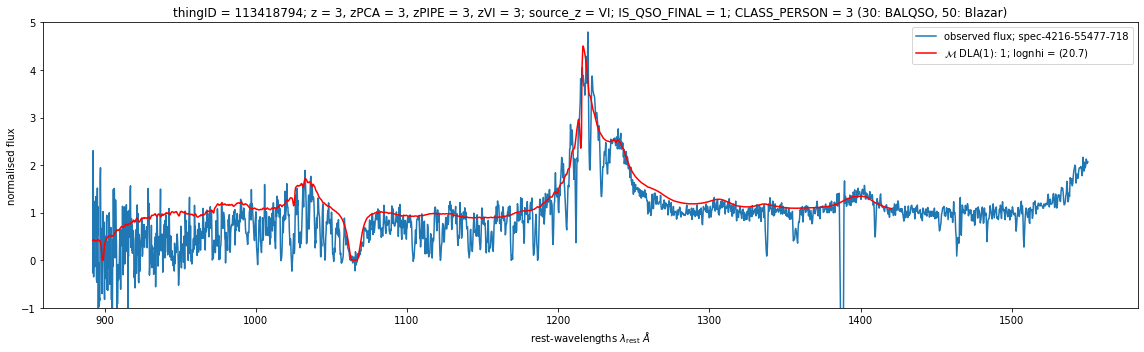

In [22]:
# plot the first one from the selection criteria posed above
nspec = all_nspecs[0]

qsos_dr16q.plot_this_mu(nspec)
plt.title(
    'thingID = {}; z = {:.2g}, zPCA = {:.2g}, zPIPE = {:.2g}, zVI = {:.2g}; source_z = {}; IS_QSO_FINAL = {}; CLASS_PERSON = {} (30: BALQSO, 50: Blazar)'.format(
        qsos_dr16q.thing_ids[nspec],
        qsos_dr16q.z_qsos[nspec],
        qsos_dr16q.hdu[1].data["Z_PCA"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_PIPE"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_VI"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["SOURCE_Z"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["IS_QSO_FINAL"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["CLASS_PERSON"][qsos_dr16q.test_real_index][nspec])
)
plt.ylim(-1, 5)
plt.tight_layout()

Let's say we want the predictions only for those with logNHI > 20.3

In [23]:
all_nspecs = np.where( (qsos_dr16q.p_dlas > 0.90) & ( qsos_dr16q.snrs > 3) & ( qsos_dr16q.z_qsos > 3) & (qsos_dr16q.all_log_nhis.max(axis=1) >= 20.3))[0] 

/home/jibancat/.local/share/virtualenvs/gp_dla_detection_multi_dla-iSf3j7m0/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


[Info] map_tau_0 = 0.005016, map_beta = 3.209


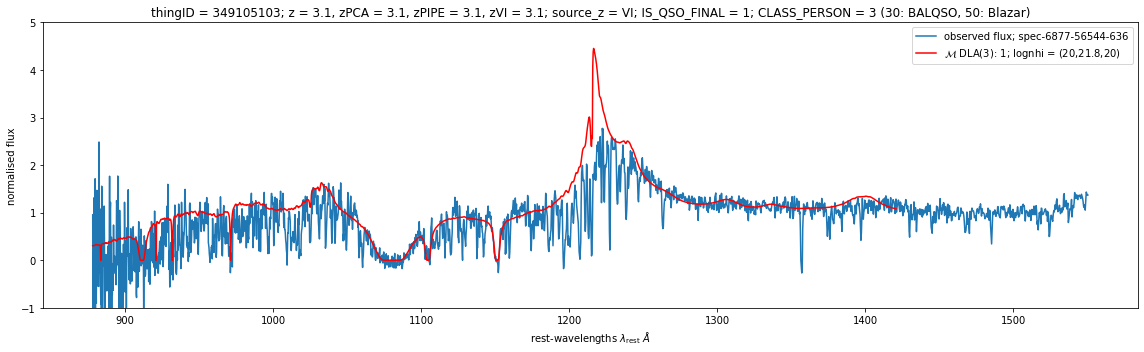

In [24]:
# plot the first one from the selection criteria posed above
nspec = all_nspecs[0]

qsos_dr16q.plot_this_mu(nspec)
plt.title(
    'thingID = {}; z = {:.2g}, zPCA = {:.2g}, zPIPE = {:.2g}, zVI = {:.2g}; source_z = {}; IS_QSO_FINAL = {}; CLASS_PERSON = {} (30: BALQSO, 50: Blazar)'.format(
        qsos_dr16q.thing_ids[nspec],
        qsos_dr16q.z_qsos[nspec],
        qsos_dr16q.hdu[1].data["Z_PCA"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_PIPE"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_VI"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["SOURCE_Z"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["IS_QSO_FINAL"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["CLASS_PERSON"][qsos_dr16q.test_real_index][nspec])
)
plt.ylim(-1, 5)
plt.tight_layout()

## Plot with the predictions with the CNN model from Parks(2018)

In [26]:
all_nspecs = np.where( (qsos_dr16q.p_dlas > 0.90) & ( qsos_dr16q.snrs > 3) & ( qsos_dr16q.z_qsos > 3) )[0] 

[Info] map_tau_0 = 0.005854, map_beta = 3.197


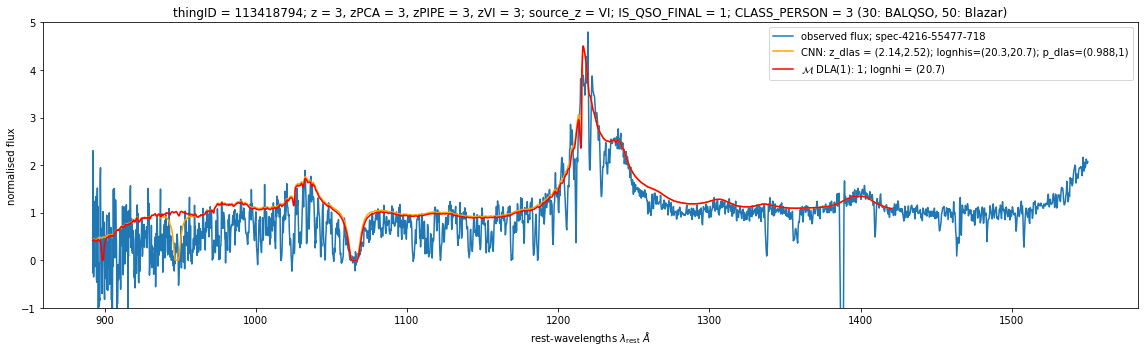

In [27]:
# plot the first one from the selection criteria posed above
nspec = all_nspecs[0]

qsos_dr16q.plot_this_mu(nspec, Parks=True)
plt.title(
    'thingID = {}; z = {:.2g}, zPCA = {:.2g}, zPIPE = {:.2g}, zVI = {:.2g}; source_z = {}; IS_QSO_FINAL = {}; CLASS_PERSON = {} (30: BALQSO, 50: Blazar)'.format(
        qsos_dr16q.thing_ids[nspec],
        qsos_dr16q.z_qsos[nspec],
        qsos_dr16q.hdu[1].data["Z_PCA"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_PIPE"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_VI"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["SOURCE_Z"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["IS_QSO_FINAL"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["CLASS_PERSON"][qsos_dr16q.test_real_index][nspec])
)
plt.ylim(-1, 5)
plt.tight_layout()

## Plot the Conditional GP (continuum prediction based on metal emissions)

In [34]:
all_nspecs = np.where( (qsos_dr16q.p_dlas > 0.90) & ( qsos_dr16q.snrs > 3) & ( qsos_dr16q.z_qsos > 3) & (qsos_dr16q.all_log_nhis.max(axis=1) >= 20.3))[0] 

/home/jibancat/.local/share/virtualenvs/gp_dla_detection_multi_dla-iSf3j7m0/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


[Info] map_tau_0 = 0.005016, map_beta = 3.209


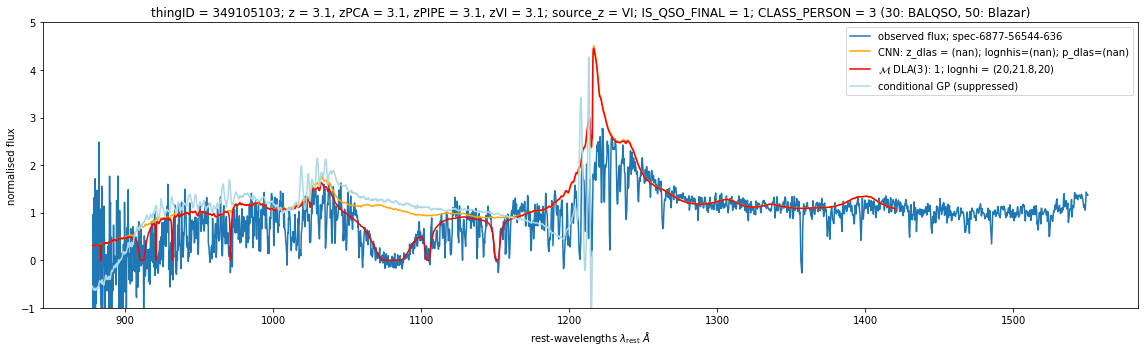

In [30]:
# plot the first one from the selection criteria posed above
nspec = all_nspecs[0]

qsos_dr16q.plot_this_mu(nspec, Parks=True, conditional_gp=True)
plt.title(
    'thingID = {}; z = {:.2g}, zPCA = {:.2g}, zPIPE = {:.2g}, zVI = {:.2g}; source_z = {}; IS_QSO_FINAL = {}; CLASS_PERSON = {} (30: BALQSO, 50: Blazar)'.format(
        qsos_dr16q.thing_ids[nspec],
        qsos_dr16q.z_qsos[nspec],
        qsos_dr16q.hdu[1].data["Z_PCA"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_PIPE"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_VI"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["SOURCE_Z"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["IS_QSO_FINAL"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["CLASS_PERSON"][qsos_dr16q.test_real_index][nspec])
)
plt.ylim(-1, 5)
plt.tight_layout()

## Plot subDLA (logNHI = 19.5 ~ 20) candidates

In [43]:
all_nspecs = np.where( (qsos_dr16q.model_posteriors[:, 1] > 0.9999) & ( qsos_dr16q.snrs > 4) )[0] 

[Info] no map values stored currently for null model ...


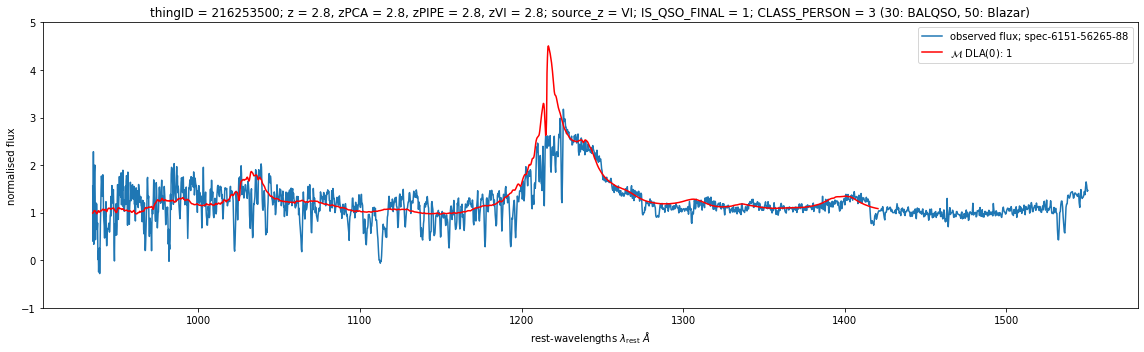

In [45]:
# plot the first one from the selection criteria posed above
nspec = all_nspecs[0]

qsos_dr16q.plot_this_mu(nspec)
plt.title(
    'thingID = {}; z = {:.2g}, zPCA = {:.2g}, zPIPE = {:.2g}, zVI = {:.2g}; source_z = {}; IS_QSO_FINAL = {}; CLASS_PERSON = {} (30: BALQSO, 50: Blazar)'.format(
        qsos_dr16q.thing_ids[nspec],
        qsos_dr16q.z_qsos[nspec],
        qsos_dr16q.hdu[1].data["Z_PCA"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_PIPE"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["Z_VI"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["SOURCE_Z"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["IS_QSO_FINAL"][qsos_dr16q.test_real_index][nspec],
        qsos_dr16q.hdu[1].data["CLASS_PERSON"][qsos_dr16q.test_real_index][nspec])
)
plt.ylim(-1, 5)
plt.tight_layout()

## Plot the kernel function

ref: CDDF_analysis.make_dr16q_plots.do_procedure_plots

In [32]:
min_lambda = qsos_dr16q.GP.min_lambda
max_lambda = qsos_dr16q.GP.max_lambda
scale = np.shape(qsos_dr16q.GP.C)[0] / (max_lambda - min_lambda)

# some wavelegnths for emission lines to plot
lyg_wavelength = 972
nv_wavelength = 1240.81
oi_wavelength = 1305.53
cii_wavelength = 1335.31
siv_wavelength = 1399.8

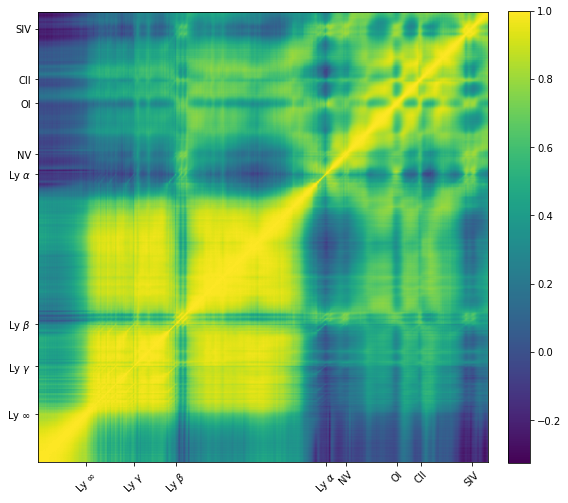

In [33]:
# plotting covariance matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(qsos_dr16q.GP.C, origin="lower")
ax.set_xticks(
    [
        (lyman_limit - min_lambda) * scale,
        (lyg_wavelength - min_lambda) * scale,
        (lyb_wavelength - min_lambda) * scale,
        (lya_wavelength - min_lambda) * scale,
        (nv_wavelength - min_lambda) * scale,
        (oi_wavelength - min_lambda) * scale,
        (cii_wavelength - min_lambda) * scale,
        (siv_wavelength - min_lambda) * scale,
    ],
)
ax.set_xticklabels(
    [
        r"Ly $\infty$",
        r"Ly $\gamma$",
        r"Ly $\beta$",
        r"Ly $\alpha$",
        r"NV",
        r"OI",
        r"CII",
        r"SIV",
    ],
    rotation=45,
)
ax.set_yticks(
    [
        (lyman_limit - min_lambda) * scale,
        (lyg_wavelength - min_lambda) * scale,
        (lyb_wavelength - min_lambda) * scale,
        (lya_wavelength - min_lambda) * scale,
        (nv_wavelength - min_lambda) * scale,
        (oi_wavelength - min_lambda) * scale,
        (cii_wavelength - min_lambda) * scale,
        (siv_wavelength - min_lambda) * scale,
    ]
)
ax.set_yticklabels(
    [
        r"Ly $\infty$",
        r"Ly $\gamma$",
        r"Ly $\beta$",
        r"Ly $\alpha$",
        r"NV",
        r"OI",
        r"CII",
        r"SIV",
    ]
)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()


## Generate DLA JSON catalogue

In [46]:
dla_json = qsos_dr16q.generate_json_catalogue(outfile="predictions_DLA_DR16Q.json")

In [51]:
# the format looks like this!
dla_json[12]

{'p_dla': 0.7340965163934929,
 'p_no_dla': 0.26590348360650695,
 'max_model_posterior': 0.734058471534007,
 'num_dlas': 1,
 'min_z_dla': 2.1562415783051954,
 'max_z_dla': 2.7188614055536613,
 'snr': 3.1704212660004876,
 'ra': 0.015233669889425983,
 'dec': 4.248977370600125,
 'plate': 8741,
 'mjd': 57390,
 'fiber_id': 973,
 'thing_id': 148457488,
 'z_qso': 2.728868328409606,
 'dlas': [{'log_nhi': 20.36463170513759, 'z_dla': 2.1657536444763275}]}